In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import warnings
from sklearn.model_selection import validation_curve, learning_curve
from utils import load_heart_data
import time
from sklearn.model_selection import KFold

## Setup

In [2]:
X, y = load_heart_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

In [3]:
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_boosted = AdaBoostClassifier(base_estimator=dt_stump, random_state=7)
clf_boosted.fit(X_train, y_train)
y_pred = clf_boosted.predict(X_test)
boosted_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost without hyperparameter tuning is %.2f%%' % (boosted_accuracy * 100))

Accuracy of Adaboost without hyperparameter tuning is 81.97%


## Model Complexity Curve - weak learners

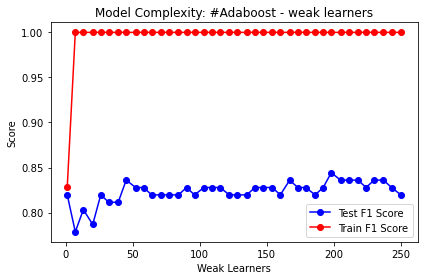

In [4]:
f1_test = []
f1_train = []
n_estimators = np.linspace(1,250,40).astype('int')
for i in n_estimators:
    dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=17)
    boosted = AdaBoostClassifier(base_estimator=dt, n_estimators=i, random_state=7)
    boosted.fit(X_train, y_train)
    y_pred_test = boosted.predict(X_test)
    y_pred_train = boosted.predict(X_train)
    f1_test.append(accuracy_score(y_test, y_pred_test))
    f1_train.append(accuracy_score(y_train, y_pred_train))

plt.plot(n_estimators, f1_test, 'o-', color='b', label='Test F1 Score')
plt.plot(n_estimators, f1_train, 'o-', color = 'r', label='Train F1 Score')
plt.ylabel('Score')
plt.xlabel('Weak Learners')

plt.title("Model Complexity: #Adaboost - weak learners")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Finding Hyperparameters

In [5]:
f1_train

[0.8287292817679558,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [6]:

num_learners_optimal = np.argmax(np.mean(f1_train)) + 1
print('Optimal number of learners for AdaBoost: %d' % num_learners_optimal)
best_clf_boosted = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=num_learners_optimal, random_state=7)
t0 = time.time()
best_clf_boosted.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0
print('Completed training in %f seconds' % train_time)
t0 = time.time()
y_pred = best_clf_boosted.predict(X_test)
t1 = time.time()
test_time = t1 - t0
print('Inference time on test data: %f seconds' % test_time)
best_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost with the best hyperparameters is %.2f%%' % (best_accuracy * 100))


Optimal number of learners for AdaBoost: 1
Completed training in 0.003650 seconds
Inference time on test data: 0.000749 seconds
Accuracy of Adaboost with the best hyperparameters is 73.77%


## Learning Curve

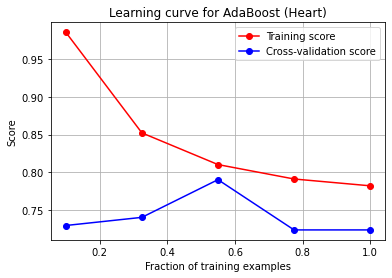

In [8]:
train_sizes = np.linspace(0.1, 1.0, 5)
best_clf_boosted = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=num_learners_optimal, random_state=7)
_, train_scores, test_scores = learning_curve(best_clf_boosted, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'ro-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'bo-', label='Cross-validation score')
plt.title('Learning curve for AdaBoost (Heart)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()